In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

(42000, 785)


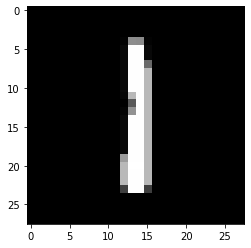

In [ ]:
data = pd.read_csv("/content/train.csv.zip")
data.head()
print(data.shape)
image_one = data.loc[2]
image_one = np.array(image_one)
index = [0]
image_one_raveled = np.delete(image_one, index)
image_one = image_one_raveled.reshape(28,28)
#print(image_one)
plt.imshow(image_one, cmap = 'gray', vmin=0, vmax=255)

In [ ]:
print(image_one_raveled.shape)

(784,)


In [ ]:
def get_neighbours_of_pixel(image,index, radius):
  width, height = image.shape
  print("the width: {}, the height: {}". format(width,height))

  row, column = index//width, index%width
  print("row: {}, column: {}". format(row,column))

  index = index
  radius = radius
  r = int(radius)

  x = np.arange(max(column-r , 0),min(column +r +1, width))
  y= np.arange(max(row-r , 0),min( +r +1+ row, height))

  X,Y = np.meshgrid(x,y)
  plt.plot(X,Y, marker = '.', color = 'k', linestyle = 'none')
  plt.show()

  R = np.sqrt(((X-column)**2+ (Y-row)**2))
  print(R)

  mask = R<radius
  print("\nthis is our true or false values to include:\n\n", mask)

  print("\nthis is the Xmask for columns\n" , X[mask])
  print("\nthis is the Ymask for rows\n", Y[mask])

  print((Y[mask]*width) + X[mask])

  neurons_to_drop = (Y[mask]*width) + X[mask]

  print(neurons_to_drop)




the width: 28, the height: 28
row: 1, column: 1


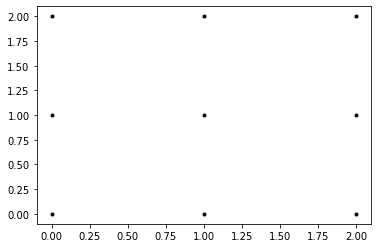

[[1.41421356 1.         1.41421356]
 [1.         0.         1.        ]
 [1.41421356 1.         1.41421356]]

this is our true or false values to include:

 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

this is the Xmask for columns
 [0 1 2 0 1 2 0 1 2]

this is the Ymask for rows
 [0 0 0 1 1 1 2 2 2]
[ 0  1  2 28 29 30 56 57 58]
[ 0  1  2 28 29 30 56 57 58]
None


In [ ]:
testie = get_neighbours_of_pixel(image_one,29 , 1.5)
print(testie)

In [ ]:
def neuron_indexes(image,pixels, radius):
  width, height = image.shape
  #print("the width: {}, the height: {}". format(width,height))
  neurons = []
  for i in range(pixels):
    row, column = i//width, i%width
    #print("row: {}, column: {}". format(row,column))

    index = i
    radius = radius
    r = int(radius)

    x = np.arange(max(column-r , 0),min(column +r +1, width))
    y= np.arange(max(row-r , 0),min( +r +1+ row, height))

    X,Y = np.meshgrid(x,y)
    #plt.plot(X,Y, marker = '.', color = 'k', linestyle = 'none')
    #plt.show()

    R = np.sqrt(((X-column)**2+ (Y-row)**2))
    #print(R)

    mask = R<radius
    #print("\nthis is our true or false values to include:\n\n", mask)

    #print("\nthis is the Xmask for columns\n" , X[mask])
    #print("\nthis is the Ymask for rows\n", Y[mask])
    #print((Y[mask]*width) + X[mask])
    neurons_to_drop = (Y[mask]*width) + X[mask]
    neurons.append(neurons_to_drop)
    #print(neurons_to_drop)
  return(neurons)




In [ ]:
neurons_for_dropping = neuron_indexes(image_one,785, 1.5)
print(neurons_for_dropping)

[array([ 0,  1, 28, 29]), array([ 0,  1,  2, 28, 29, 30]), array([ 1,  2,  3, 29, 30, 31]), array([ 2,  3,  4, 30, 31, 32]), array([ 3,  4,  5, 31, 32, 33]), array([ 4,  5,  6, 32, 33, 34]), array([ 5,  6,  7, 33, 34, 35]), array([ 6,  7,  8, 34, 35, 36]), array([ 7,  8,  9, 35, 36, 37]), array([ 8,  9, 10, 36, 37, 38]), array([ 9, 10, 11, 37, 38, 39]), array([10, 11, 12, 38, 39, 40]), array([11, 12, 13, 39, 40, 41]), array([12, 13, 14, 40, 41, 42]), array([13, 14, 15, 41, 42, 43]), array([14, 15, 16, 42, 43, 44]), array([15, 16, 17, 43, 44, 45]), array([16, 17, 18, 44, 45, 46]), array([17, 18, 19, 45, 46, 47]), array([18, 19, 20, 46, 47, 48]), array([19, 20, 21, 47, 48, 49]), array([20, 21, 22, 48, 49, 50]), array([21, 22, 23, 49, 50, 51]), array([22, 23, 24, 50, 51, 52]), array([23, 24, 25, 51, 52, 53]), array([24, 25, 26, 52, 53, 54]), array([25, 26, 27, 53, 54, 55]), array([26, 27, 54, 55]), array([ 0,  1, 28, 29, 56, 57]), array([ 0,  1,  2, 28, 29, 30, 56, 57, 58]), array([ 1,  2

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
print(Y_train)
print(Y_train.shape)
print(X_train.shape)

[9 3 9 ... 1 3 3]
(41000,)
(784, 41000)


In [ ]:
def init_params(X):
    W1 = np.random.rand(10, X.shape[0]) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

In [ ]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params(X)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            #print(accuracy)
    return W1, b1, W2, b2, accuracy

In [ ]:
#W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

In [ ]:
def opt_gradient_descent_partone(X, neurons_indexs):
  max_result = float('-Inf')
  results = []
  for i in neurons_indexs:
    index = i
    X1 = np.delete(X, (index), axis=0)
    W1, b1, W2, b2, accuracy = gradient_descent(X1, Y_train, 0.10, 20)
    results.append(accuracy)

    if accuracy > max_result:
      max_result = accuracy
    #if accuracy < threshold:
      #X = np.delete(X, (index), axis=0)
      print("\n")
      print(max_result)
  return(max_result, results)




In [ ]:
training = opt_gradient_descent_partone(X_train, neurons_for_dropping)

Iteration:  0
[1 2 6 ... 1 1 2] [9 3 9 ... 1 3 3]
Iteration:  10
[1 0 1 ... 1 1 1] [9 3 9 ... 1 3 3]


0.22985365853658538
Iteration:  0
[4 5 5 ... 5 4 5] [9 3 9 ... 1 3 3]
Iteration:  10
[0 0 5 ... 1 0 5] [9 3 9 ... 1 3 3]


0.2386341463414634
Iteration:  0
[5 1 9 ... 1 9 9] [9 3 9 ... 1 3 3]
Iteration:  10
[4 2 6 ... 1 1 9] [9 3 9 ... 1 3 3]
Iteration:  0
[3 0 0 ... 3 0 9] [9 3 9 ... 1 3 3]
Iteration:  10
[0 4 0 ... 7 0 4] [9 3 9 ... 1 3 3]
Iteration:  0
[3 7 3 ... 7 3 5] [9 3 9 ... 1 3 3]
Iteration:  10
[4 2 1 ... 7 3 2] [9 3 9 ... 1 3 3]
Iteration:  0
[4 4 4 ... 8 8 6] [9 3 9 ... 1 3 3]
Iteration:  10
[1 2 5 ... 1 3 1] [9 3 9 ... 1 3 3]
Iteration:  0
[4 4 8 ... 8 4 8] [9 3 9 ... 1 3 3]
Iteration:  10
[7 7 8 ... 6 4 6] [9 3 9 ... 1 3 3]
Iteration:  0
[1 0 4 ... 4 7 5] [9 3 9 ... 1 3 3]
Iteration:  10
[1 0 4 ... 4 3 5] [9 3 9 ... 1 3 3]
Iteration:  0
[0 4 0 ... 0 6 6] [9 3 9 ... 1 3 3]
Iteration:  10
[0 4 0 ... 8 6 6] [9 3 9 ... 1 3 3]


0.24429268292682926
Iteration:  0
[2 2 7 ... 2

In [ ]:
# def optimization(X):
#   max_result = float('-Inf')
#   for i in range(0, X.shape[0]):
#     X_array = np.delete(X, (i), axis=0)
#     print(X_array)
#     result  = X_array.sum(axis=0)
#     print(result)
#     if result[0] > max_result:
#       max_result = result[0]
#   return(max_result)

In [ ]:
# def optimized_gradient_descent(X, Y, alpha, iterations):
#   max_result = float('-Inf')
#   for i in range(0, X.shape[0]):
#     X = np.delete(X, (i), axis=0)
#     W1, b1, W2, b2 = init_params(X)
#     for i in range(iterations):
#         Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
#         dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
#         W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
#         if i % 100 == 0:
#             print("Iteration: ", i)
#             predictions = get_predictions(A2)
#             accuracy = get_accuracy(predictions, Y)
#             print(accuracy)
#         if accuracy > max_result:
#           max_result = accuracy
#           print(max_result)
#     return W1, b1, W2, b2, max_result

In [ ]:
# W1, b1, W2, b2, max_result = optimized_gradient_descent(X_train, Y_train, 0.10, 500)

In [ ]:
# def opt_gradient_descent(X, Y, alpha, iterations):
#   max_result = float('-Inf')
#   for i in range(0, X.shape[0]):
#     X = np.delete(X, (i), axis=0)
#     W1, b1, W2, b2 = init_params(X)
#     print(w1,b1,w2,b2)
    # for i in range(iterations):
    #     Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    #     dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    #     W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    #     print("Iteration: ", i)
    #     predictions = get_predictions(A2)
    #     accuracy = get_accuracy(predictions, Y)
    #     print(accuracy)
    #return W1, b1, W2, b2, max_result

In [ ]:
#W1, b1, W2, b2, max_result = opt_gradient_descent(X_train, Y_train, 0.10, 20)